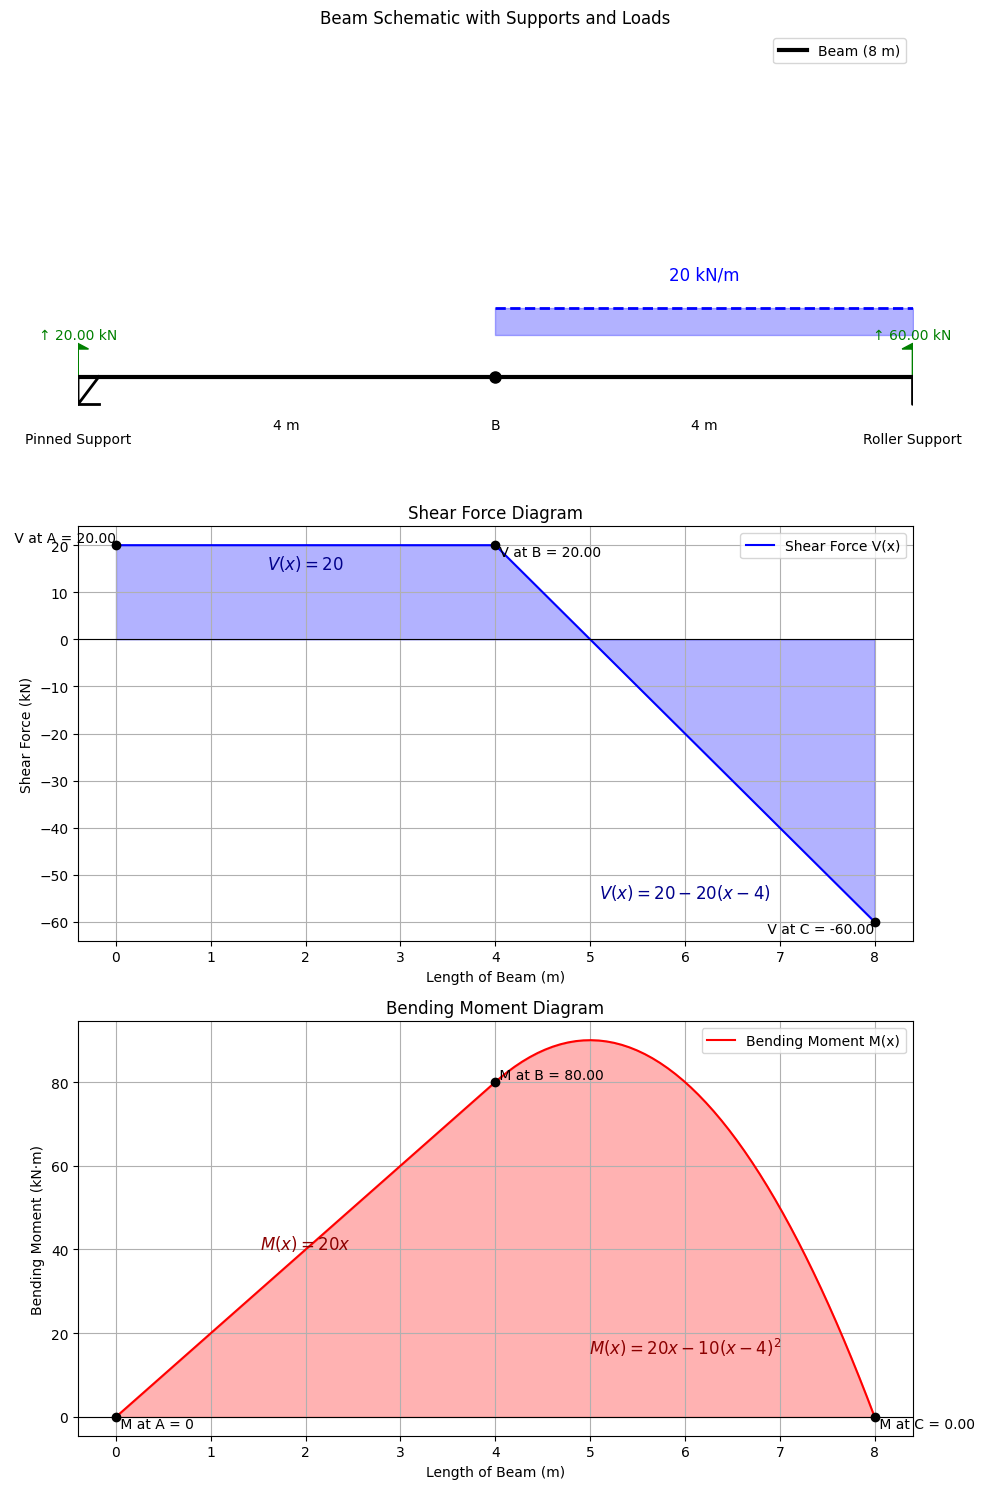

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (in kN and m)
L1 = 4   # m (distance from A to B)
L2 = 4   # m (distance from B to C)
L = L1 + L2  # m (total length of beam, 8 m)
w = 20   # kN/m (distributed load between B and C, 4 to 8 m)

# Calculate reactions at supports (A at 0 m, C at 8 m, B not a support)
# Total force from distributed load (20 kN/m over 4 m) = 80 kN, centroid at x = 6 m
# RA + RC - 80 = 0
# RC * 8 - 80 * 6 = 0 (moment about A)
# RC = 480 / 8 = 60 kN
# RA = 80 - 60 = 20 kN
RA = 20.0    # kN (reaction at A, upward, pinned support)
RB = 0       # kN (no reaction at B)
RC = 60.0    # kN (reaction at C, upward, roller support)

# Discretized x values along the beam
x = np.linspace(0, L, 100)

# Define the piecewise shear force function:
# For 0 ≤ x < 4:  V(x) = RA = 20 kN
# For 4 ≤ x ≤ 8:  V(x) = 20 - 20(x - 4)
V = np.piecewise(x, [x < L1, x >= L1],
                 [lambda x: 20.0, 
                  lambda x: 20.0 - 20 * (x - 4)])

# Define the piecewise bending moment function:
# For 0 ≤ x < 4:  M(x) = RA * x = 20x
# For 4 ≤ x ≤ 8:  M(x) = 20x - (20 * (x - 4)^2) / 2
M = np.piecewise(x, [x < L1, x >= L1],
                 [lambda x: 20.0 * x, 
                  lambda x: 20.0 * x - 10 * (x - 4)**2])

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# -------------------------
# Beam Schematic
# -------------------------
ax1.set_xlim(0, L)
ax1.set_ylim(-5, 25)
ax1.axis('off')
ax1.set_title("Beam Schematic with Supports and Loads")

# Draw the beam with dimensions
ax1.plot([0, 8], [0, 0], 'k-', linewidth=3, label="Beam (8 m)")
ax1.text(2, -3, '4 m', horizontalalignment='center', verticalalignment='top')
ax1.text(6, -3, '4 m', horizontalalignment='center', verticalalignment='top')

# Supports
# Pinned support at A (0 m)
ax1.plot([0, 0, 0.2], [0, -2, 0], 'k-', linewidth=2)
ax1.plot([0, 0.2], [-2, -2], 'k-', linewidth=2)
ax1.text(0, -4, 'Pinned Support', horizontalalignment='center', verticalalignment='top')

# Roller support at C (8 m)
ax1.plot([8, 8, 8.2], [0, -2, 0], 'k-', linewidth=2)
ax1.text(8, -4, 'Roller Support', horizontalalignment='center', verticalalignment='top')

# Mark point B (4 m)
ax1.plot(4, 0, 'ko', markersize=8)
ax1.text(4, -3, 'B', horizontalalignment='center', verticalalignment='top')

# Distributed load (20 kN/m from 4 m to 8 m)
dist_load_x = np.linspace(4, 8, 20)
dist_load_y = np.zeros_like(dist_load_x) + 5
ax1.plot(dist_load_x, dist_load_y, 'b--', linewidth=2)
ax1.fill_between(dist_load_x, dist_load_y, dist_load_y - 2, color='blue', alpha=0.3)
ax1.text(6, 7, '20 kN/m', horizontalalignment='center', fontsize=12, color='blue')

# Reactions
ax1.arrow(0, 0, 0, 2, head_width=0.2, head_length=0.4, fc='green', ec='green')
ax1.text(0, 2.5, f'↑ {RA:.2f} kN', horizontalalignment='center', verticalalignment='bottom', color='green')
ax1.arrow(8, 0, 0, 2, head_width=0.2, head_length=0.4, fc='green', ec='green')
ax1.text(8, 2.5, f'↑ {RC:.2f} kN', horizontalalignment='center', verticalalignment='bottom', color='green')

ax1.legend()

# -------------------------
# Shear Force Diagram
# -------------------------
ax2.plot(x, V, label="Shear Force V(x)", color='blue')
ax2.fill_between(x, V, color='blue', alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Shear Force Diagram")
ax2.set_xlabel("Length of Beam (m)")
ax2.set_ylabel("Shear Force (kN)")
ax2.grid(True)
ax2.legend()

# Key shear values
V_A = 20.0           # at x = 0
V_B = 20.0           # at x = 4 (just before load)
V_C = 20.0 - 20 * (8 - 4)  # at x = 8, should be -60 kN

ax2.scatter([0, 4, 8], [V_A, V_B, V_C], color='black', zorder=3)
ax2.text(0, V_A, f" V at A = {V_A:.2f}", verticalalignment='bottom', horizontalalignment='right')
ax2.text(4, V_B, f" V at B = {V_B:.2f}", verticalalignment='top', horizontalalignment='left')
ax2.text(8, V_C, f" V at C = {V_C:.2f}", verticalalignment='top', horizontalalignment='right')

# Shear equations
ax2.text(2, 15, r'$V(x)=20$', horizontalalignment='center', fontsize=12, color='darkblue')
ax2.text(6, -55, r'$V(x)=20-20(x-4)$', horizontalalignment='center', fontsize=12, color='darkblue')

# -------------------------
# Bending Moment Diagram
# -------------------------
ax3.plot(x, M, label="Bending Moment M(x)", color='red')
ax3.fill_between(x, M, color='red', alpha=0.3)
ax3.axhline(0, color='black', linewidth=0.8)
ax3.set_title("Bending Moment Diagram")
ax3.set_xlabel("Length of Beam (m)")
ax3.set_ylabel("Bending Moment (kN·m)")
ax3.grid(True)
ax3.legend()

# Key moment values
M_A = 0              # at x = 0
M_B = 20.0 * 4       # at x = 4, 80 kN·m
M_C = 20.0 * 8 - 10 * (8 - 4)**2  # at x = 8, should be 0

ax3.scatter([0, 4, 8], [M_A, M_B, M_C], color='black', zorder=3)
ax3.text(0, M_A, " M at A = 0", verticalalignment='top')
ax3.text(4, M_B, f" M at B = {M_B:.2f}", verticalalignment='bottom')
ax3.text(8, M_C, f" M at C = {M_C:.2f}", verticalalignment='top')

# Moment equations
ax3.text(2, 40, r'$M(x)=20x$', horizontalalignment='center', fontsize=12, color='darkred')
ax3.text(6, 15, r'$M(x)=20x-10(x-4)^2$', horizontalalignment='center', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()